<a href="https://colab.research.google.com/github/djrl10/latihan-pertemuan-1/blob/master/LSTM_SDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:
https://github.com/c2nes/javalang
Software Defect Prediction via ConvolutionalNeural Network
Seml: A Semantic LSTM Model for Software Defect Prediction
Automatically Learning Semantic Features for Defect Prediction
https://github.com/kevinqiu1990/TCNN
Transfer Convolutional Neural Network for Cross-Project Defect Prediction 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install javalang
import tensorflow as tf
import javalang
import javalang.tree as jlt
from os import walk
import pandas as pd
from io import StringIO
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np
import codecs
import os
import glob
import re , itertools
from html import unescape
!pip install unidecode
from unidecode import unidecode
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from string import punctuation

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

     |████████████████████████████████| 245kB 5.1MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


1)Method invocation and class instance creation nodes:
We extract and record these nodes using their method or
class names. For example, we extract method pop() and
push() in File2.java in Figure 1 and record them as pop
and push.

2)Declaration nodes: We extract method declaration, type
declaration and enum declaration nodes, and record them
using their names.

3)Control-flow nodes: We extract those statements or
clauses related to control flow of a program, e.g., if state-
ment, for statement, while statement, catch clause.
Control-flow nodes are recorded using their statement types,
e.g., if statement is recorded as if, and catch clause is recorded
as catch.
Therefore

karena hanya 3 aturan yg digunakan maka types node dari AST yg digunakan adalah dibawah ini:

In [3]:
types = [jlt.FormalParameter, jlt.BasicType, jlt.PackageDeclaration, jlt.InterfaceDeclaration, jlt.CatchClauseParameter,
         jlt.ClassDeclaration, jlt.MethodInvocation, jlt.SuperMethodInvocation, jlt.MemberReference, jlt.SuperMemberReference,
         jlt.ConstructorDeclaration, jlt.ReferenceType, jlt.MethodDeclaration, jlt.VariableDeclarator, jlt.IfStatement,
         jlt.WhileStatement, jlt.DoStatement, jlt.ForStatement, jlt.AssertStatement, jlt.BreakStatement,
         jlt.ContinueStatement, jlt.ReturnStatement, jlt.ThrowStatement, jlt.SynchronizedStatement, jlt.TryStatement,
         jlt.SwitchStatement, jlt.BlockStatement, jlt.StatementExpression, jlt.TryResource, jlt.CatchClause,
         jlt.CatchClauseParameter, jlt.SwitchStatementCase, jlt.ForControl, jlt.EnhancedForControl]

Function untuk parse dari source code ke AST -> Token

Didefinisikan secara manual

In [4]:
def parse(source):
    tokens = javalang.parse.parse(source)
    result = []
    for path, node in tokens:
        if isinstance(node, jlt.PackageDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.IfStatement):
            result.append("if")
            continue
        if isinstance(node, jlt.InterfaceDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ClassDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.MethodInvocation):
            result.append(node.member)
            continue
        if isinstance(node, jlt.MemberReference):
            result.append(node.member)
            continue
        if isinstance(node, jlt.ConstructorDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ReferenceType):
            result.append(node.name)
            continue
        if isinstance(node, jlt.MethodDeclaration):
            result.append(node.name)
            continue
        if isinstance(node, jlt.VariableDeclarator):
            result.append(node.name)
            continue
        if isinstance(node, jlt.ThrowStatement):
            result.append("throw")
            continue
        if isinstance(node, jlt.TryStatement):
            result.append("try")
            continue
        if isinstance(node, jlt.BlockStatement):
            result.append("block")
            continue
        if isinstance(node, jlt.CatchClause):
            result.append("catch")
            continue
        if isinstance(node, jlt.ForStatement):
            result.append("for")
            continue
        if isinstance(node, jlt.AssertStatement):
            result.append("assert")
            continue
        if isinstance(node, jlt.BreakStatement):
            result.append("break")
            continue
        if isinstance(node, jlt.ContinueStatement):
            result.append("cotinue")
            continue
        if isinstance(node, jlt.ReturnStatement):
            result.append("return")
            continue
        if isinstance(node, jlt.ReturnStatement):
            result.append("return")
            continue
        if isinstance(node, jlt.ThrowStatement):
            result.append("throw")
            continue
        if isinstance(node, jlt.SwitchStatement):
            result.append("switch")
            continue
        if isinstance(node, jlt.WhileStatement):
            result.append("while")
            continue
        if isinstance(node, jlt.DoStatement):
            result.append("do")
            continue
        if isinstance(node, jlt.CatchClauseParameter):
            result.append(node.types)
            continue
        if isinstance(node, jlt.BasicType):
            result.append(node.name)
            continue
        if isinstance(node, jlt.SynchronizedStatement):
            result.append("Synchronized")
            continue
    return result


Proses mengubah Source Code (File) -> AST -> Token

Arsitektur Folder


"Nama Project"

    "Defect"

        "File Defect 1"

        "File Defect 2"

        ....

    "Non-Defect"

        "File Non-Defect 1"

        "File Non-Defect 2"

        ....

In [5]:
def Tokenize(dir_name):
    df_list = []
    df = pd.DataFrame(columns=['File','Token','Defect'])
    for (dirpath, dirnames, filenames) in walk(dir_name):
        for label in dirnames: 
            for (dirpath, dirnames, filenames) in walk(dir_name+'/'+label):
                for filename in filenames:
                    f = open(dir_name+'/'+label+'/'+filename, "r")
                    f = f.read()
                    try:
                        p = parse(f)
                    except:
                        continue

                    temp = pd.DataFrame([[filename,p,label]],columns=['File','Token','Defect'])
                    df_list.append(temp)
                break
        break
    df = pd.concat(df_list)
    df = df.reset_index()
    return df

In [6]:
list_label = ['Tokencamel-1_6', 'Tokencamel-1_4']
list_path = ['/content/drive/My Drive/data_set/camel-1.6', '/content/drive/My Drive/data_set/camel-1.4']
datasets = dict()


In [7]:
for index in range(2) :
  data = Tokenize(list_path[index])
  datasets.update({list_label[index] : data})

In [8]:
features = dict()
labels = dict()

In [9]:
for key in datasets.keys() :
  list_token = datasets[key].iloc[:, 2:-1]
  label = datasets[key].iloc[:, -1:].values
  features.update({key : list_token})
  labels.update({key : label})
  

In [10]:
clean_features = dict()

In [11]:
for key in datasets.keys() :
  feature = features[key].values
  clean_feature = list()
  for idx, val in enumerate(feature) :
    filtered_feature = [x for x in val[0] if isinstance(x, str)]
    clean_feature.append(filtered_feature)
  clean_features.update({key : clean_feature})

In [12]:
join_features = dict()
join_label = dict()

In [13]:
for key in datasets.keys() :
  lb = pd.DataFrame(labels[key], columns=['labels'])
  lb_dum = pd.get_dummies(lb.labels)
  lb_dum.head()
  label = lb_dum[['Defect', 'Non-Defect']].values
  join_label.update({key : label})
  new_feature = [', '.join(item) for item in clean_features[key]]
  join_features.update({key : new_feature})

#Word Embedding

In [14]:
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [15]:
join_features['Tokencamel-1_4']

['org.apache.camel.processor, RedeliveryPolicy, Random, randomNumberGenerator, Log, LOG, getLog, RedeliveryPolicy, int, maximumRedeliveries, long, initialRedeliveryDelay, long, maximumRedeliveryDelay, double, backOffMultiplier, boolean, useExponentialBackOff, double, collisionAvoidanceFactor, boolean, useCollisionAvoidance, RedeliveryPolicy, toString, String, return, maximumRedeliveries, copy, RedeliveryPolicy, try, return, RedeliveryPolicy, clone, catch, throw, RuntimeException, e, e, shouldRedeliver, boolean, int, if, getMaximumRedeliveries, block, return, return, redeliveryCounter, getMaximumRedeliveries, sleep, long, long, redeliveryDelay, getRedeliveryDelay, redeliveryDelay, if, redeliveryDelay, block, if, isDebugEnabled, block, debug, redeliveryDelay, try, sleep, redeliveryDelay, catch, if, isDebugEnabled, block, debug, e, e, return, redeliveryDelay, getRedeliveryDelay, long, long, long, redeliveryDelay, if, previousDelay, block, redeliveryDelay, initialRedeliveryDelay, if, useEx

In [16]:
join_label['Tokencamel-1_4']

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [17]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
token_trains = dict()
token_tests = dict()
label_trains = dict()
label_tests = dict()
for key in datasets.keys():
  tkn_train, tkn_test, lbl_train, lbl_test = train_test_split(join_features[key], join_label[key], test_size=0.2, shuffle=True)
  token_trains.update({key:tkn_train})
  token_tests.update({key:tkn_test})
  label_trains.update({key:lbl_train})
  label_tests.update({key:lbl_test})

In [18]:
print(len(token_trains['Tokencamel-1_4']))
print(len(token_tests['Tokencamel-1_4']))
print(len(label_trains['Tokencamel-1_4']))
print(len(label_tests['Tokencamel-1_4']))

668
167
668
167


In [19]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(token_trains['Tokencamel-1_4']) 
tokenizer.fit_on_texts(token_tests['Tokencamel-1_4'])
 
sekuens_train = tokenizer.texts_to_sequences(token_trains['Tokencamel-1_4'])
sekuens_test = tokenizer.texts_to_sequences(token_tests['Tokencamel-1_4'])
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

print(padded_test.shape)
print(padded_train.shape)

(167, 797)
(668, 1639)


In [20]:
# model
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 435,586
Trainable params: 435,586
Non-trainable params: 0
_________________________________________________________________


In [21]:
# model fit
history = model.fit(padded_train, label_trains['Tokencamel-1_4'], epochs=5, 
                    validation_data=(padded_test, label_tests['Tokencamel-1_4']), verbose=2, 
                    validation_steps=30)

Epoch 1/5
21/21 - 45s - loss: 0.5892 - accuracy: 0.7859 - val_loss: 0.4499 - val_accuracy: 0.8443
Epoch 2/5
21/21 - 40s - loss: 0.4721 - accuracy: 0.8069
Epoch 3/5
21/21 - 40s - loss: 0.3597 - accuracy: 0.8398
Epoch 4/5
21/21 - 40s - loss: 0.2484 - accuracy: 0.9281
Epoch 5/5
21/21 - 40s - loss: 0.1293 - accuracy: 0.9581


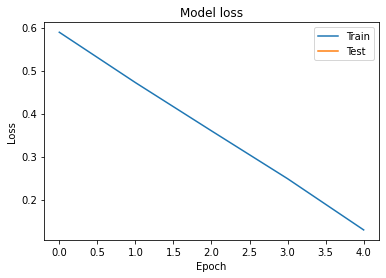

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

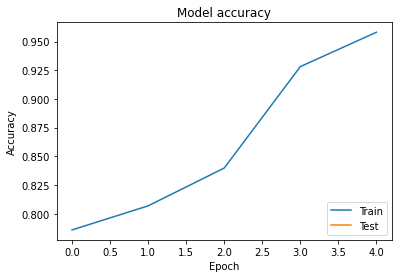

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()